# Lab 3 - Model Evaluation and Selection with Decision Tree

- Your name: Dao Quang Duy

- Your student code: 21110398

## 1. Tạo một Decision Tree với thư viện scikit-learn

Ở phần này, bạn sẽ tạo và vẽ một Decision Tree cho bài toán phân loại và hồi quy.

### 1.1. Tìm hiểu tổng quan về dữ liệu

Phần này sẽ dùng tập dữ liệu `HeartDisease.csv` để minh họa. Chi tiết về tập dữ liệu có thể được tham khảo ở https://archive.ics.uci.edu/ml/datasets/heart+Disease.

#### 1.1.1. Load dữ liệu

In [1]:
import pandas as pd

# Đọc dữ liệu từ "HeartDisease.csv"
heart = pd.read_csv('./data/HeartDisease.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/HeartDisease.csv'

#### 1.1.2. Khám phá tổng quan về dữ liệu

In [ ]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
# Loại bỏ các giá trị bị thiếu (NA)
heart_dropna = heart.dropna()

In [ ]:
# Gán biến `AHD`, là `y`, và chuyển nó sang dạng nhị phân 
# (`AHD` == 'Yes' ứng với 1 và AHD'] == 'No' ứng với 0)
y = heart_dropna['AHD'].replace({'Yes': 1, 'No': 0})

# Gán biến các biến còn lại là `X`
X = heart_dropna[['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal']]

In [ ]:
# Chuyển các biến categorical sang dạng one-hot
oh_X = pd.get_dummies(X, drop_first = True)

In [ ]:
oh_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   297 non-null    int64  
 1   Sex                   297 non-null    int64  
 2   RestBP                297 non-null    int64  
 3   Chol                  297 non-null    int64  
 4   Fbs                   297 non-null    int64  
 5   RestECG               297 non-null    int64  
 6   MaxHR                 297 non-null    int64  
 7   ExAng                 297 non-null    int64  
 8   Oldpeak               297 non-null    float64
 9   Slope                 297 non-null    int64  
 10  Ca                    297 non-null    float64
 11  ChestPain_nonanginal  297 non-null    uint8  
 12  ChestPain_nontypical  297 non-null    uint8  
 13  ChestPain_typical     297 non-null    uint8  
 14  Thal_normal           297 non-null    uint8  
 15  Thal_reversable       2

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()
oh_X[columns_to_scale] = scaler.fit_transform(oh_X[columns_to_scale])

### 1.2. Chia dữ liệu

Ta sẽ chia dữ liệu làm 2 tập train và test với tỷ lệ 70/30.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    oh_X, y, test_size = 0.3, random_state = 1)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))

Labels counts in y: 297
Labels counts in y_train: 207
Labels counts in y_test: 90


### 1.3. Fit mô hình

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Tạo mô hình Decision Tree Classifier dùng sklearn với max_depth = 3, và criterion = 'gini'
dtree = DecisionTreeClassifier(max_depth=3, criterion='gini')

# Fit mô hình với train data
dtree.fit(X_train, y_train)

# Predict trên train/test data dùng mô hình đã train
y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)

### 1.4. Vẽ cây

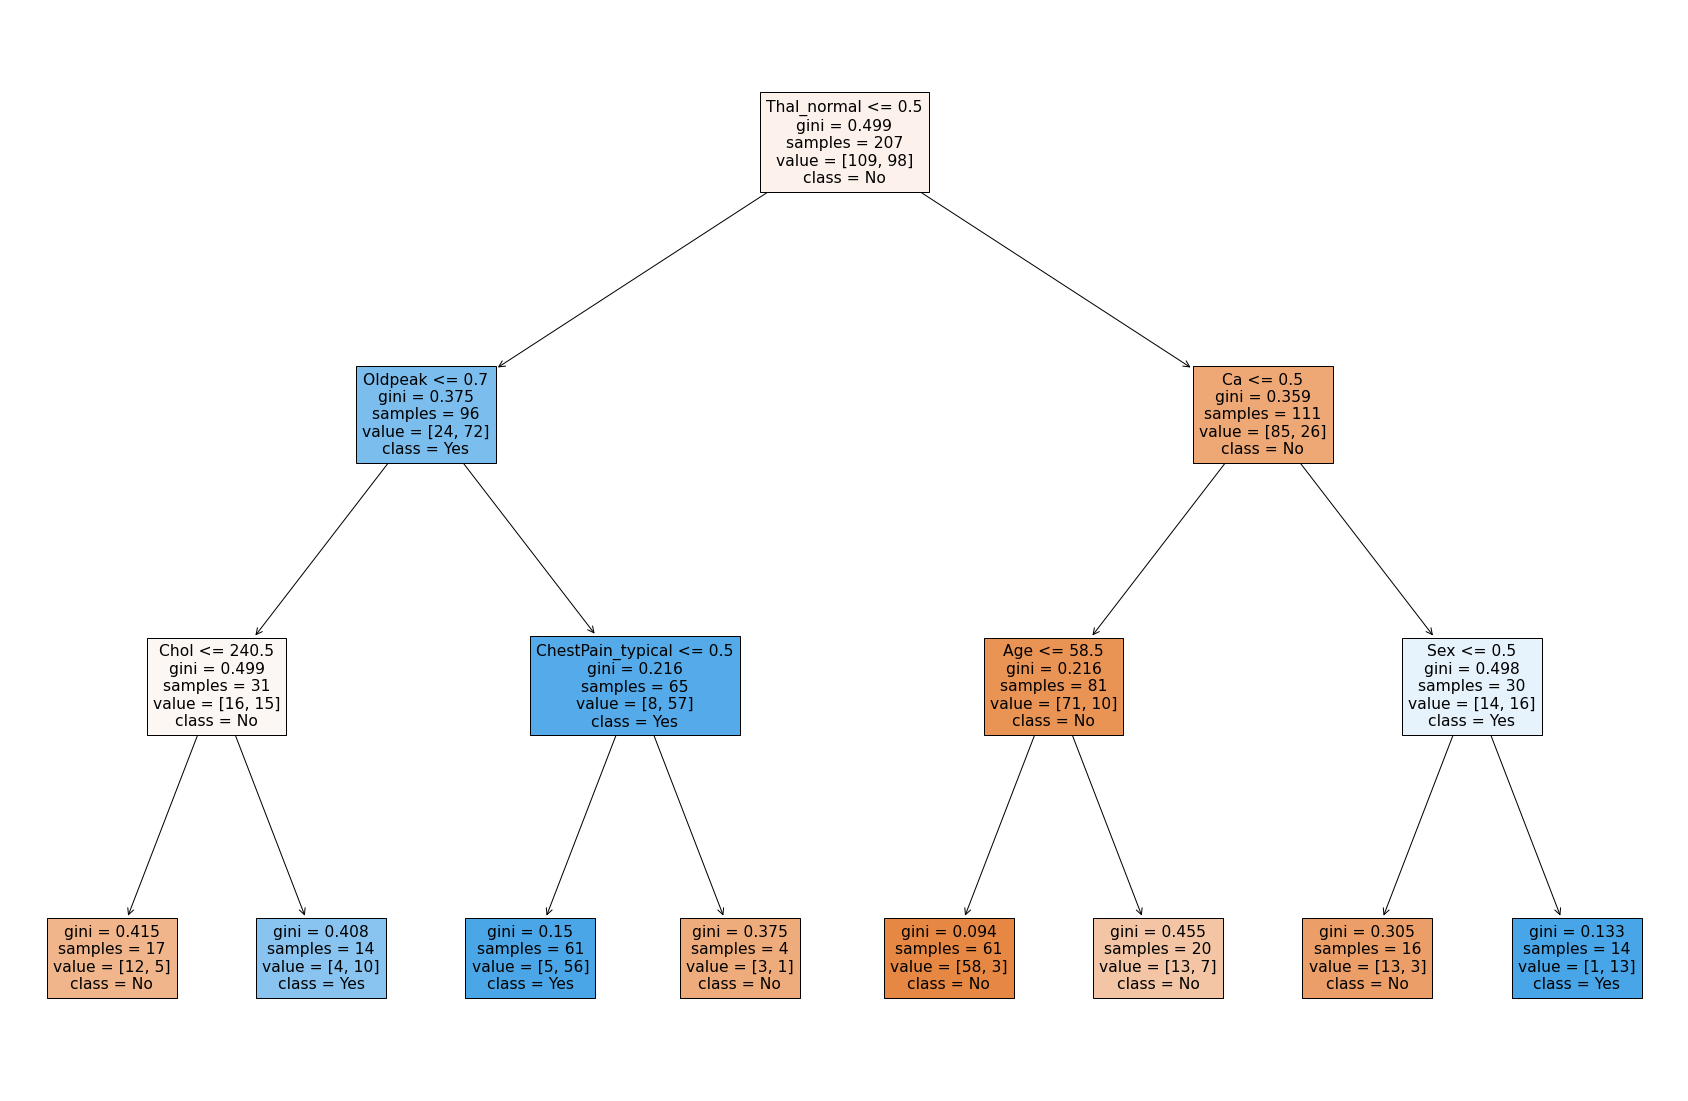

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (30, 20))

# Plot the Decision Tree
plot_tree(dtree, filled=True, feature_names=X_train.columns.tolist(), class_names=['No', 'Yes'])

plt.show();

### 1.5. Đánh giá mô hình

Ta sẽ đánh giá mô hình dùng confusion matrix (CM) và các độ đo accuracy, f1_score

In [ ]:
import sklearn.metrics as metrics

# In ra confusion matrix và accuracy cho train data
train_cm = metrics.confusion_matrix(y_train, y_pred_train)
print('The train confusion matrix for dtree is', ': \n', train_cm)

train_acc = metrics.accuracy_score(y_train, y_pred_train)
print(f'The train accuracy is: {train_acc}')

# In ra confusion matrix và accuracy cho test data
test_cm = metrics.confusion_matrix(y_test, y_pred_test)
print('The test confusion matrix for dtree is', ': \n', test_cm)

test_acc = metrics.accuracy_score(y_test, y_pred_test)
print(f'The test accuracy is: {test_acc}')

The train confusion matrix for dtree is : 
 [[99 10]
 [19 79]]
The train accuracy is: 0.8599033816425121
The test confusion matrix for dtree is : 
 [[41 10]
 [ 8 31]]
The test accuracy is: 0.8


## 2. Tạo một mô hình Decision Tree khác với thư viện scikit-learn

### 2.1. Tạo và huấn luyện mô hình

Ta sẽ tạo và huấn luyện 2 mô hình Decision Tree, một mô hình với max_depth = 2 và một mô hình với max_depth = 10.

In [ ]:
dt1 = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dt2 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)

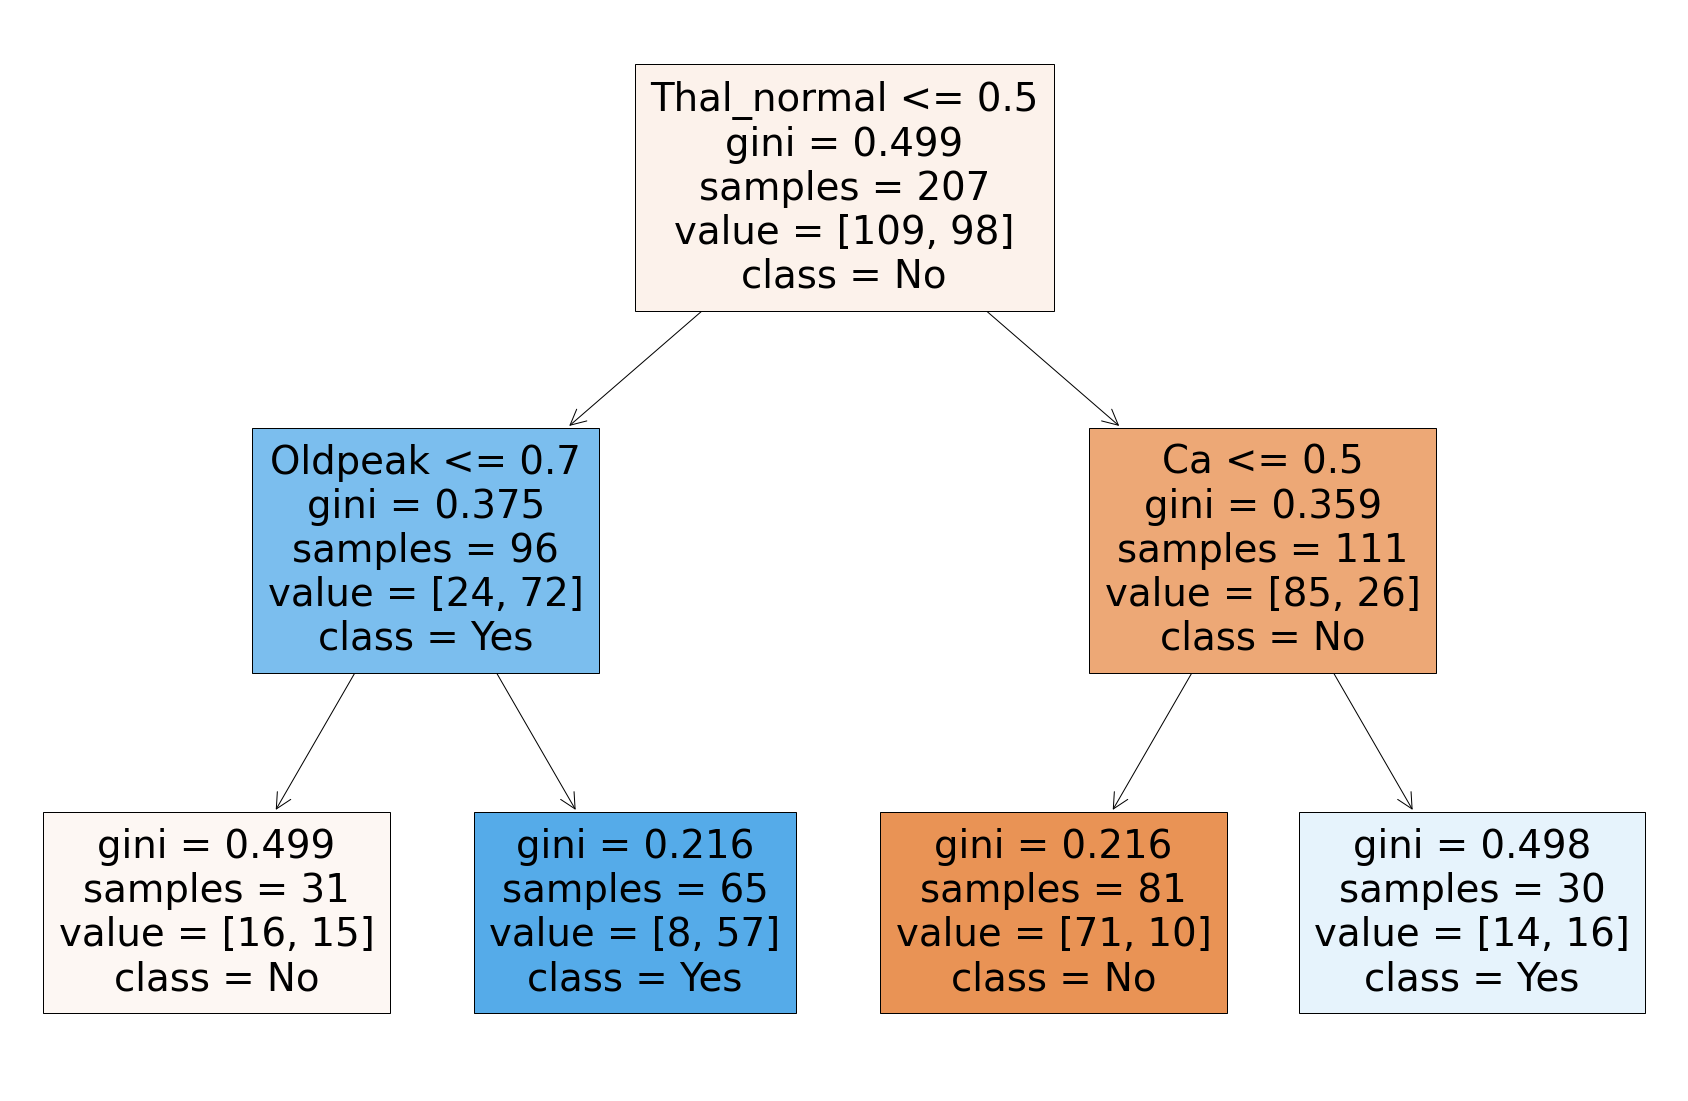

In [ ]:
plt.figure(figsize = (30, 20))

# Plot the Decision Tree 1
plot_tree(dt1, filled=True, feature_names=X_train.columns.tolist(), class_names=['No', 'Yes'])

plt.show();

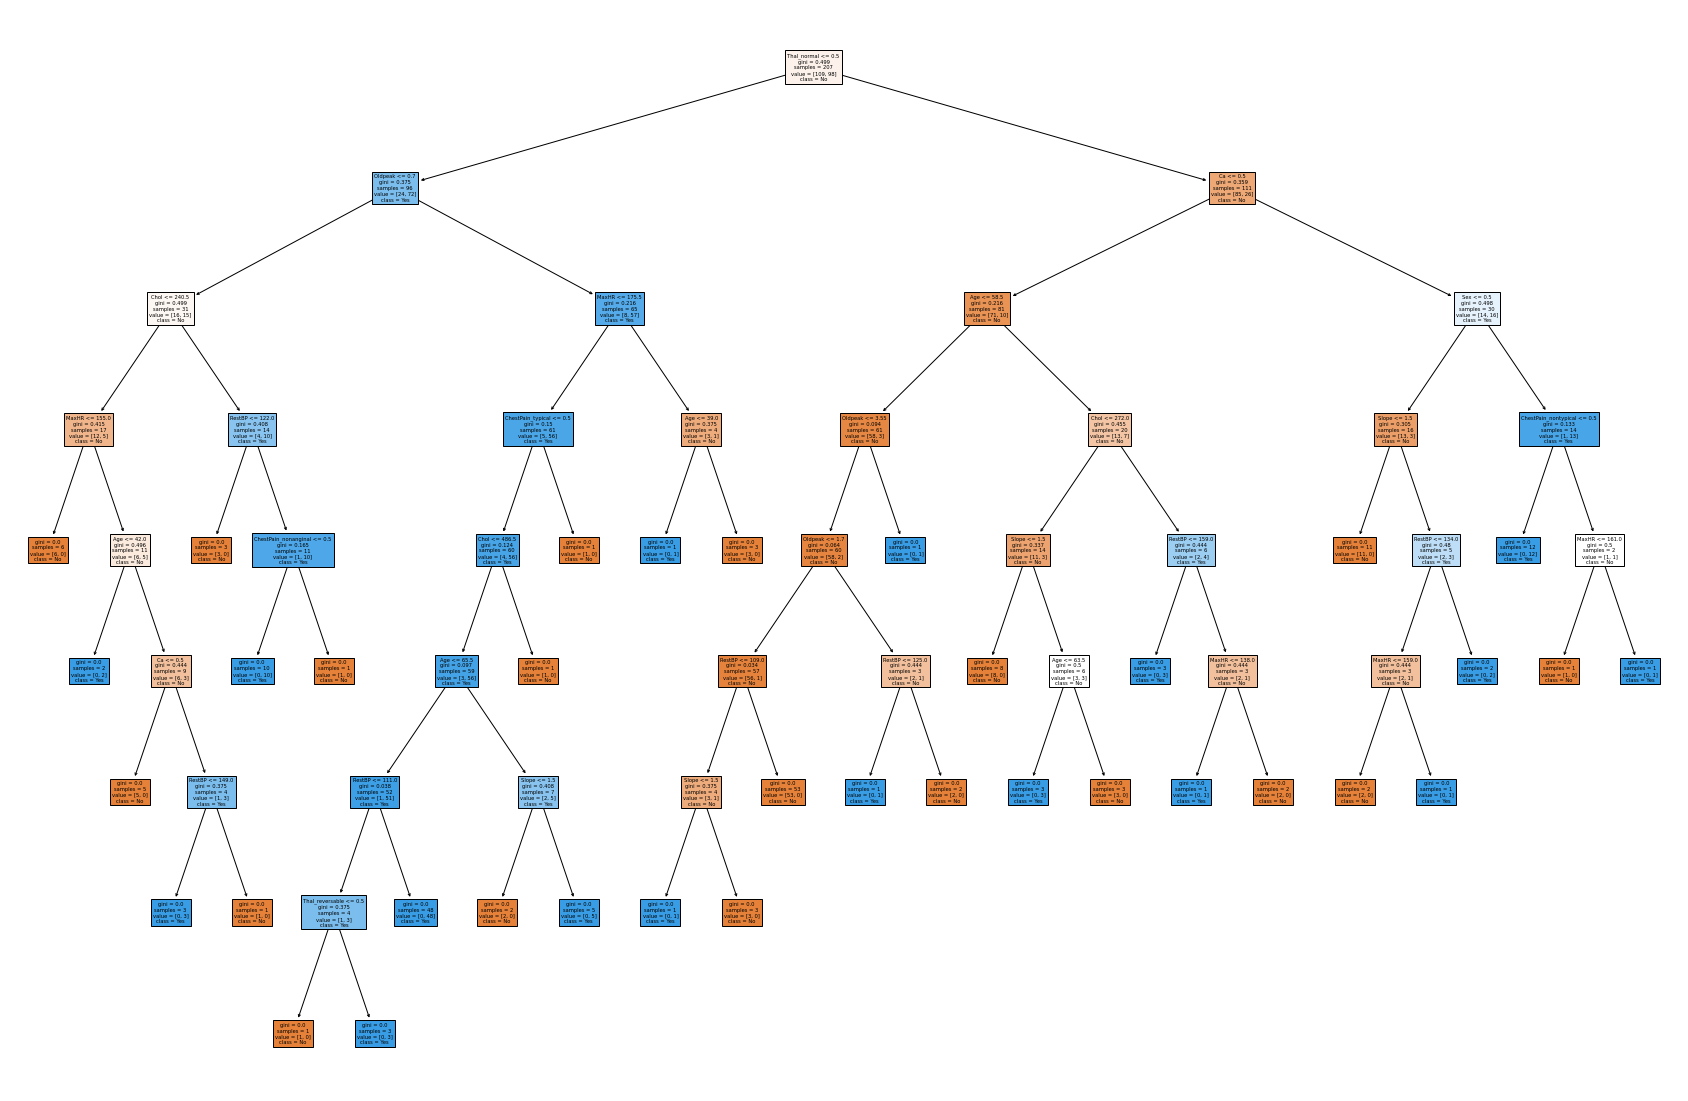

In [ ]:
plt.figure(figsize = (30, 20))

# Plot the Decision Tree 2
plot_tree(dt2, filled=True, feature_names=X_train.columns.tolist(), class_names=['No', 'Yes'])

plt.show();

### 2.3. Dự đoán và đánh giá các mô hình

In [ ]:
import sklearn.metrics as metrics

# Predict trên test data dùng các mô hình đã train
y_pred_train_dt1 = dt1.predict(X_train)
y_pred_train_dt2 = dt2.predict(X_train)
y_pred_test_dt1 = dt1.predict(X_test)
y_pred_test_dt2 = dt2.predict(X_test)

# In ra các confusion matrix và accuracy cho các tree
dt1_train_cm = metrics.confusion_matrix(y_train, y_pred_train_dt1)
dt1_test_cm = metrics.confusion_matrix(y_test, y_pred_test_dt1)
dt1_train_acc = metrics.accuracy_score(y_train, y_pred_train_dt1)
dt1_test_acc = metrics.accuracy_score(y_test, y_pred_test_dt1)

dt2_train_cm = metrics.confusion_matrix(y_train, y_pred_train_dt2)
dt2_test_cm = metrics.confusion_matrix(y_test, y_pred_test_dt2)
dt2_train_acc = metrics.accuracy_score(y_train, y_pred_train_dt2)
dt2_test_acc = metrics.accuracy_score(y_test, y_pred_test_dt2)

print('The train confusion matrix for dt1 is', ': \n', dt1_train_cm)
print('The train accuracy for dt1 is', ': \n', dt1_train_acc)
print('The test confusion matrix for dt1 is', ': \n', dt1_test_cm)
print('The test accuracy for dt1 is', ': \n', dt1_test_acc)

print('The train confusion matrix for dt2 is', ': \n', dt2_train_cm)
print('The train accuracy for dt2 is', ': \n', dt2_train_acc)
print('The test confusion matrix for dt2 is', ': \n', dt2_test_cm)
print('The test accuracy for dt2 is', ': \n', dt2_test_acc)

The train confusion matrix for dt1 is : 
 [[87 22]
 [25 73]]
The train accuracy for dt1 is : 
 0.7729468599033816
The test confusion matrix for dt1 is : 
 [[36 15]
 [10 29]]
The test accuracy for dt1 is : 
 0.7222222222222222
The train confusion matrix for dt2 is : 
 [[109   0]
 [  0  98]]
The train accuracy for dt2 is : 
 1.0
The test confusion matrix for dt2 is : 
 [[32 19]
 [ 7 32]]
The test accuracy for dt2 is : 
 0.7111111111111111


### 2.4. So sánh kết quả của của mô hình

In [ ]:
print('Max Depth: {:3} | Train Accuracy: {:5} | Test Accuracy: {:5}'.
          format(2, round(dt1_train_acc, 2), round(dt1_test_acc, 2)))
print('Max Depth: {:3} | Train Accuracy: {:5} | Test Accuracy: {:5}'.
          format(3, round(train_acc, 2), round(test_acc, 2)))
print('Max Depth: {:3} | Train Accuracy: {:5} | Test Accuracy: {:5}'.
          format(10, round(dt2_train_acc, 2), round(dt2_test_acc, 2)))

Max Depth:   2 | Train Accuracy:  0.77 | Test Accuracy:  0.72
Max Depth:   3 | Train Accuracy:  0.86 | Test Accuracy:   0.8
Max Depth:  10 | Train Accuracy:   1.0 | Test Accuracy:  0.71


## 3. Model selection cho Decision Tree dùng phương pháp holdout

![holdout_model_selection](./image/holdout_model_selection.JPG)

### 3.1. Chia dữ liệu

In [ ]:
# Chia dữ liệu thành 2 tập train_val và test set với tỷ lệ 80/2
X_train_val, X_test, y_train_val, y_test = train_test_split(
    oh_X, y, test_size = 0.2, random_state = 1)

# Tiếp theo, chia tập train_val thành 2 tập train và validation set với tỷ lệ 75/25
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size = 0.25, random_state = 1)

### 3.2. Huấn luyện mô hình với các giá trị tham số `max_depth` khác nhau

In [ ]:
import numpy as np

# Create three lists for train, validation, and test F1-score
train_f1 = []
val_f1 = []
test_f1 = []

# List of hyper-parameter values 
depths = [1, 2, 3, 5, 10, 15]
y_train
# Loop over all the C values
for depth in depths:
    # Tạo mô hình Logistic Ridge regression với tham số C
    dtree = DecisionTreeClassifier(max_depth = depth)

    # Fit mô hình trên train data
    dtree.fit(X_train, y_train)
    
    # Predict trên train set 
    y_train_pred = dtree.predict(X_train)
    
    # Predict trên validation set 
    y_val_pred = dtree.predict(X_val)

    # Predict trên test set 
    y_test_pred = dtree.predict(X_test)
    
    # Tính train, validation, và test F1-score
    f1_train = metrics.f1_score(y_true = y_train, y_pred = y_train_pred, average = 'macro')
    f1_val = metrics.f1_score(y_true = y_val, y_pred = y_val_pred, average = 'macro')
    f1_test = metrics.f1_score(y_true = y_test, y_pred = y_test_pred, average = 'macro')
    
    # Thêm các F1-score vào các list tương ứng
    train_f1.append(f1_train)
    val_f1.append(f1_val)
    test_f1.append(f1_test)
    
    # In ra train, validation, và test F1-score theo C
    print('max_depth: {:3} | train f1: {:5} | val f1: {:5} | test f1: {:5}'.
          format(depth, round(f1_train, 2), round(f1_val, 2), round(f1_test, 2)))

max_depth:   1 | train f1:  0.75 | val f1:  0.73 | test f1:  0.69
max_depth:   2 | train f1:   0.8 | val f1:  0.72 | test f1:  0.77
max_depth:   3 | train f1:  0.83 | val f1:  0.78 | test f1:  0.68
max_depth:   5 | train f1:  0.93 | val f1:  0.87 | test f1:  0.75
max_depth:  10 | train f1:   1.0 | val f1:   0.8 | test f1:   0.7
max_depth:  15 | train f1:   1.0 | val f1:  0.83 | test f1:  0.75


### 3.3. Chọn giá trị `max_depth` cho kết quả tốt nhất trên validation set

In [ ]:
# Chọn giá trị max_depth (hyper-parameter), cho val F1-score lớn nhất trên validation data 
best_max_depth = 5

# In ra best max_depth (hyper-parameter)
print(f'The best max_depth (hyper-parameter) value, max_depth = {best_max_depth}')

The best max_depth (hyper-parameter) value, max_depth = 5


### 3.4. Vẽ biểu đồ train/val/test F1-score theo `max_depth`

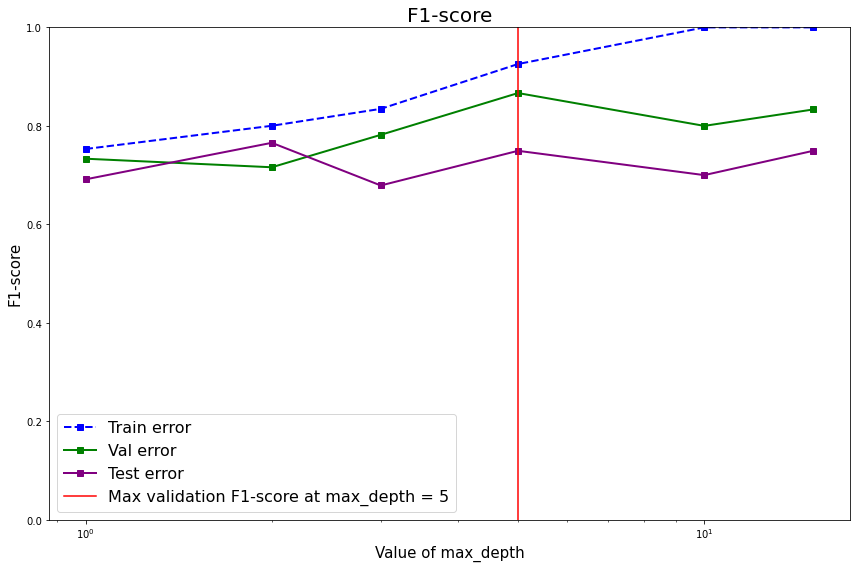

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

# Vẽ biểu đồ train F1-score theo các giá trị max_depth
ax.plot(depths, train_f1, 's--', label = 'Train error', color = 'blue', linewidth = 2)

# Vẽ biểu đồ validation F1-score theo các giá trị max_depth
ax.plot(depths, val_f1, 's-', label = 'Val error', color ='green', linewidth = 2)

# Vẽ biểu đồ test F1-score theo các giá trị max_depth
ax.plot(depths, test_f1, 's-', label = 'Test error', color ='purple', linewidth = 2)

# Vẽ đường thẳng đứng ứng với best max_depth
ax.axvline(best_max_depth, 0, 1, color = 'r', label = f'Max validation F1-score at max_depth = {best_max_depth}')

ax.set_xlabel('Value of max_depth', fontsize = 15)
ax.set_ylabel('F1-score', fontsize = 15)
ax.set_ylim([0, 1])
ax.legend(loc = 'lower left', fontsize = 16)
ax.set_title('F1-score', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

### 3.5. Train lại mô hình trên train_val set với `best_max_depth`

In [ ]:
# Tao và fit mô hình trên train_val set với best_max_depth
best_tree = DecisionTreeClassifier(max_depth=best_max_depth).fit(X_train, y_train)

# Predict trên train_val/test set dùng mô hình đã train
y_pred_train_val = best_tree.predict(X_train_val)
y_pred_test = best_tree.predict(X_test)

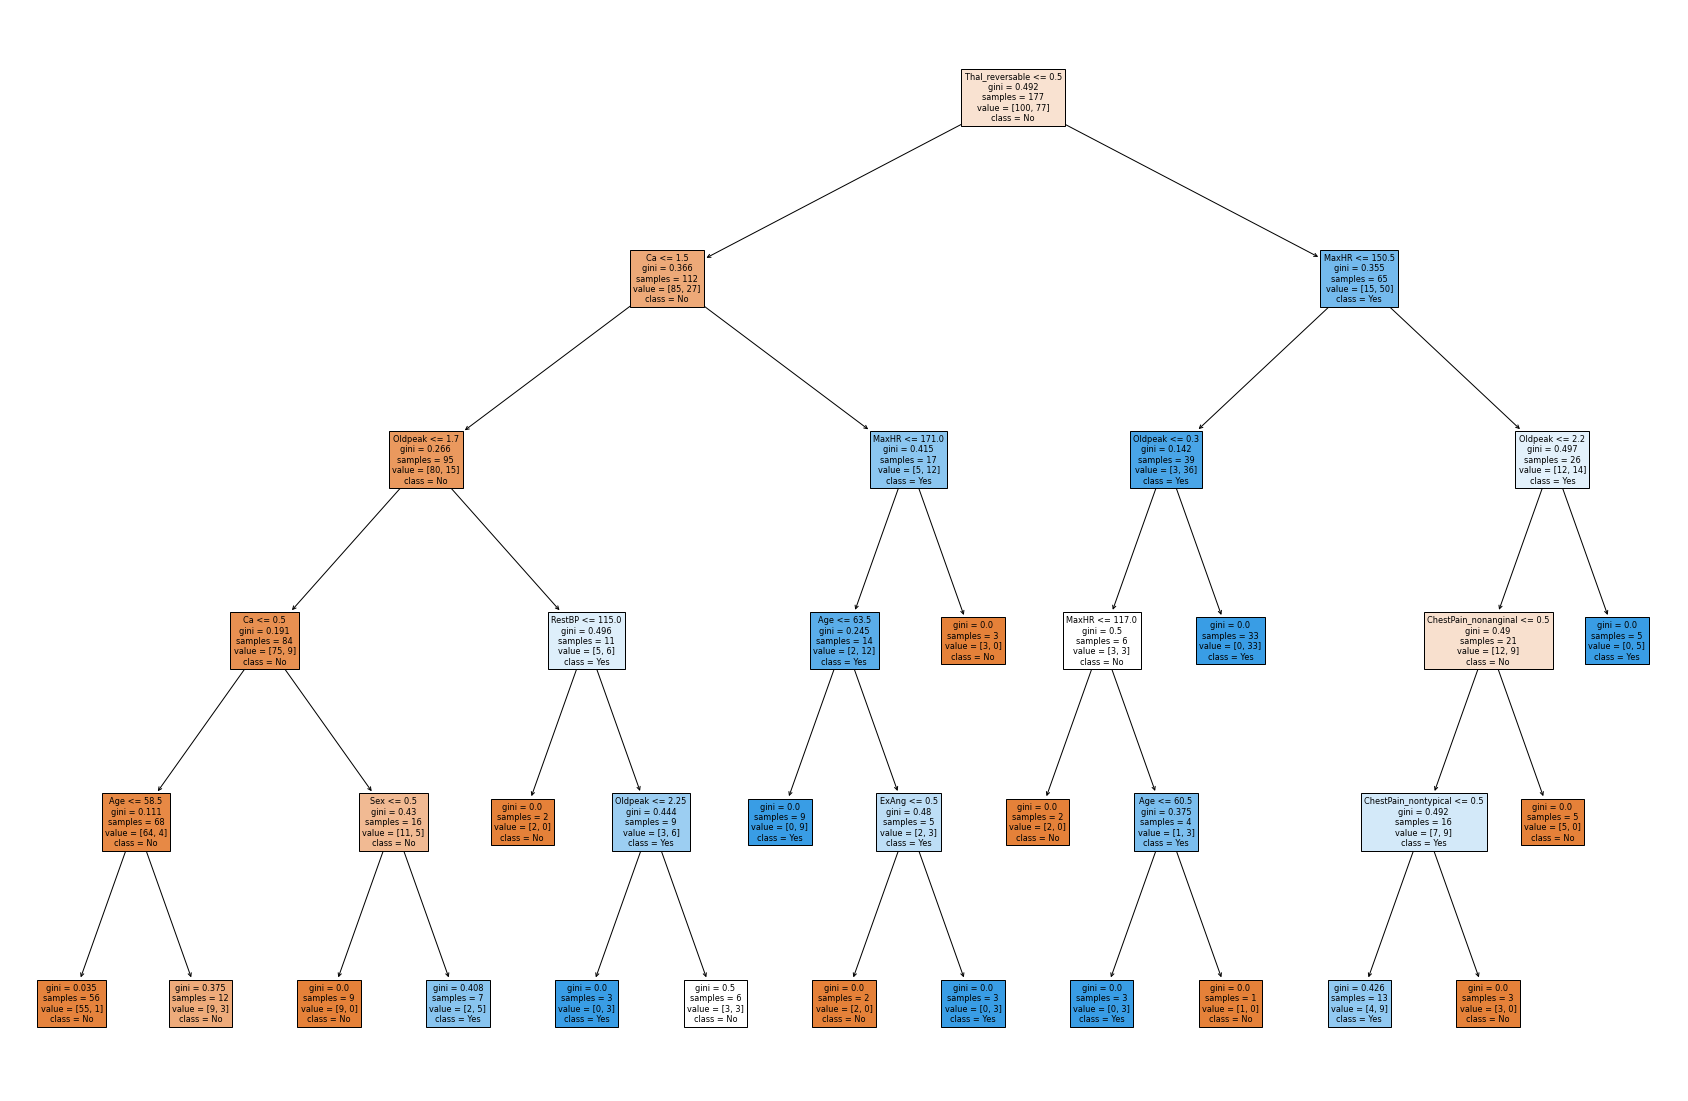

In [ ]:
plt.figure(figsize = (30, 20))

# Plot the best Decision Tree
plot_tree(best_tree, filled=True, feature_names=X_train.columns.tolist(), class_names=['No', 'Yes'])

plt.show();

### 3.6. Đánh giá best model trên test set

In [ ]:
import sklearn.metrics as metrics

# In ra confusion matrix và accuracy cho train_val set
train_val_cm = metrics.confusion_matrix(y_train_val, y_pred_train_val)
print('The train_val confusion matrix for best_tree is', ': \n', train_val_cm)

train_val_acc = metrics.accuracy_score(y_train_val, y_pred_train_val)
print(f'The train_val accuracy is: {train_val_acc}')

# In ra confusion matrix và accuracy cho test set
test_cm = metrics.confusion_matrix(y_test, y_pred_test)
print('The test confusion matrix for best_tree is', ': \n', test_cm)

test_acc = metrics.accuracy_score(y_test, y_pred_test)
print(f'The test accuracy is: {test_acc}')

The train_val confusion matrix for best_tree is : 
 [[119  11]
 [ 12  95]]
The train_val accuracy is: 0.9029535864978903
The test confusion matrix for best_tree is : 
 [[23  7]
 [ 9 21]]
The test accuracy is: 0.7333333333333333


## 4. Model selection cho Decision Tree Classification dùng phương pháp cross validation

![k-folds cv model selection](./image/cross_val.png)

### 6.1. Chia dữ liệu

In [ ]:
# Chia dữ liệu thành 2 tập train_val và test set với tỷ lệ 80/20
X_train_val, X_test, y_train_val, y_test = train_test_split(
    oh_X, y, test_size = 0.2, random_state = 1)

### 6.2. Dùng cross validation cho model selection

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

depths = [1, 2, 3, 5, 10, 15]

K = 5
kf = KFold(n_splits = K, shuffle = True, random_state = 1)

mean_train_f1s = []
mean_val_f1s = []
mean_test_f1s = []

for depth in depths:
    train_f1s = []
    val_f1s = []
    test_f1s = []
    for train_index, val_index in kf.split(X_train_val, y_train_val):
        # split data theo train_index và test_index
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        # Tạo model theo max_depth...................
        dtree = DecisionTreeClassifier(max_depth = depth)
        
        # Fit the model trên train set
        dtree.fit(X_train, y_train)
        
        # Predict trên train, val, và test set
        y_train_pred = dtree.predict(X_train)
        y_val_pred = dtree.predict(X_val)
        y_test_pred = dtree.predict(X_test)
        
        # Tính train, val, và test F1-score
        train_f1 = f1_score(y_train, y_train_pred)
        val_f1 = f1_score(y_val, y_val_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        
        # Thêm train và test F1-score vào các list tương ứng
        train_f1s.append(train_f1)
        val_f1s.append(val_f1)
        test_f1s.append(test_f1)
        
    # In ra train, validation, và test F1-score theo max_depth
    print('max_depth: {:6} | mean(train_f1): {:6} | mean(val_f1): {:6} | mean(test_f1): {:6}'.
          format(depth, round(np.mean(train_f1s), 3), round(np.mean(val_f1s), 3), round(np.mean(test_f1s), 3)))
    
    # Thêm train, validation, và test F1-score vào các list tương ứng
    mean_train_f1s.append(np.mean(train_f1s))
    mean_val_f1s.append(np.mean(val_f1s))
    mean_test_f1s.append(np.mean(test_f1s))

max_depth:      1 | mean(train_f1):  0.734 | mean(val_f1):  0.716 | mean(test_f1):  0.739
max_depth:      2 | mean(train_f1):  0.751 | mean(val_f1):   0.66 | mean(test_f1):  0.728
max_depth:      3 | mean(train_f1):  0.814 | mean(val_f1):   0.73 | mean(test_f1):  0.753
max_depth:      5 | mean(train_f1):  0.927 | mean(val_f1):  0.723 | mean(test_f1):   0.76
max_depth:     10 | mean(train_f1):    1.0 | mean(val_f1):  0.714 | mean(test_f1):  0.774
max_depth:     15 | mean(train_f1):    1.0 | mean(val_f1):  0.676 | mean(test_f1):  0.755


### 4.3. Chọn giá trị `max_depth` cho kết quả tốt nhất trên validation set

In [ ]:
# Chọn giá trị max_depth (hyper-parameter) cho mean(val_f1) lớn nhất
best_max_depth = 3

# In ra best max_depth (hyper-parameter)
print(f'The best max_depth (hyper-parameter) value, max_depth = {best_max_depth}')

The best max_depth (hyper-parameter) value, max_depth = 3


### 4.4. Vẽ biểu đồ train/val/test F1-score theo `max_depth`

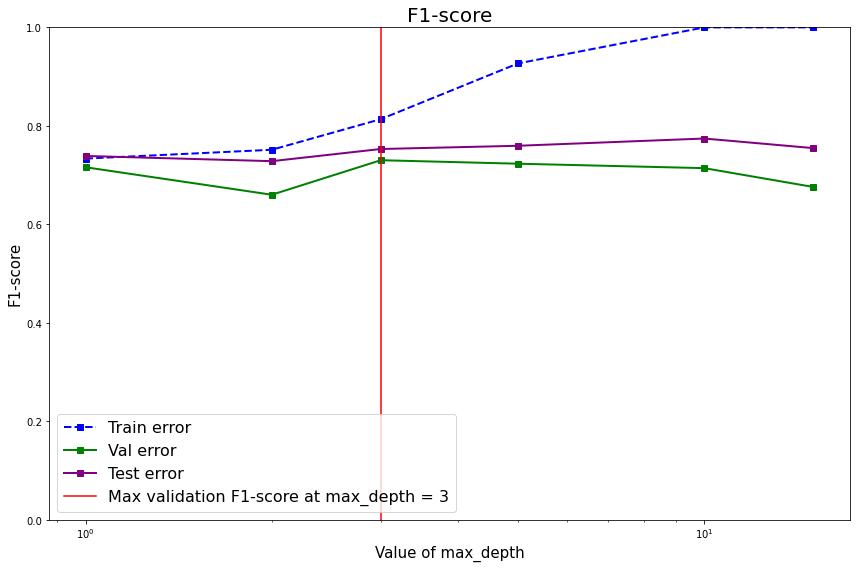

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

# Vẽ biểu đồ train F1-score theo các giá trị max_depth
ax.plot(depths, mean_train_f1s, 's--', label = 'Train error', color = 'blue', linewidth = 2)

# Vẽ biểu đồ validation F1-score theo các giá trị max_depth
ax.plot(depths, mean_val_f1s, 's-', label = 'Val error', color ='green', linewidth = 2)

# Vẽ biểu đồ test F1-score theo các giá trị max_depth
ax.plot(depths, mean_test_f1s, 's-', label = 'Test error', color ='purple', linewidth = 2)

# Vẽ đường thẳng đứng ứng với best max_depth
ax.axvline(best_max_depth, 0, 1, color = 'r', label = f'Max validation F1-score at max_depth = {best_max_depth}')

ax.set_xlabel('Value of max_depth', fontsize = 15)
ax.set_ylabel('F1-score', fontsize = 15)
ax.set_ylim([0, 1])
ax.legend(loc = 'lower left', fontsize = 16)
ax.set_title('F1-score', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

### 4.5. Train lại mô hình với `best_max_depth` trên train_val set

In [ ]:
# Tao và fit mô hình trên train_val set với best_max_depth
best_tree = DecisionTreeClassifier(max_depth=best_max_depth).fit(X_train_val, y_train_val)

# Predict trên train_val/test set dùng mô hình đã train
y_pred_train_val = best_tree.predict(X_train_val)
y_pred_test = best_tree.predict(X_test)

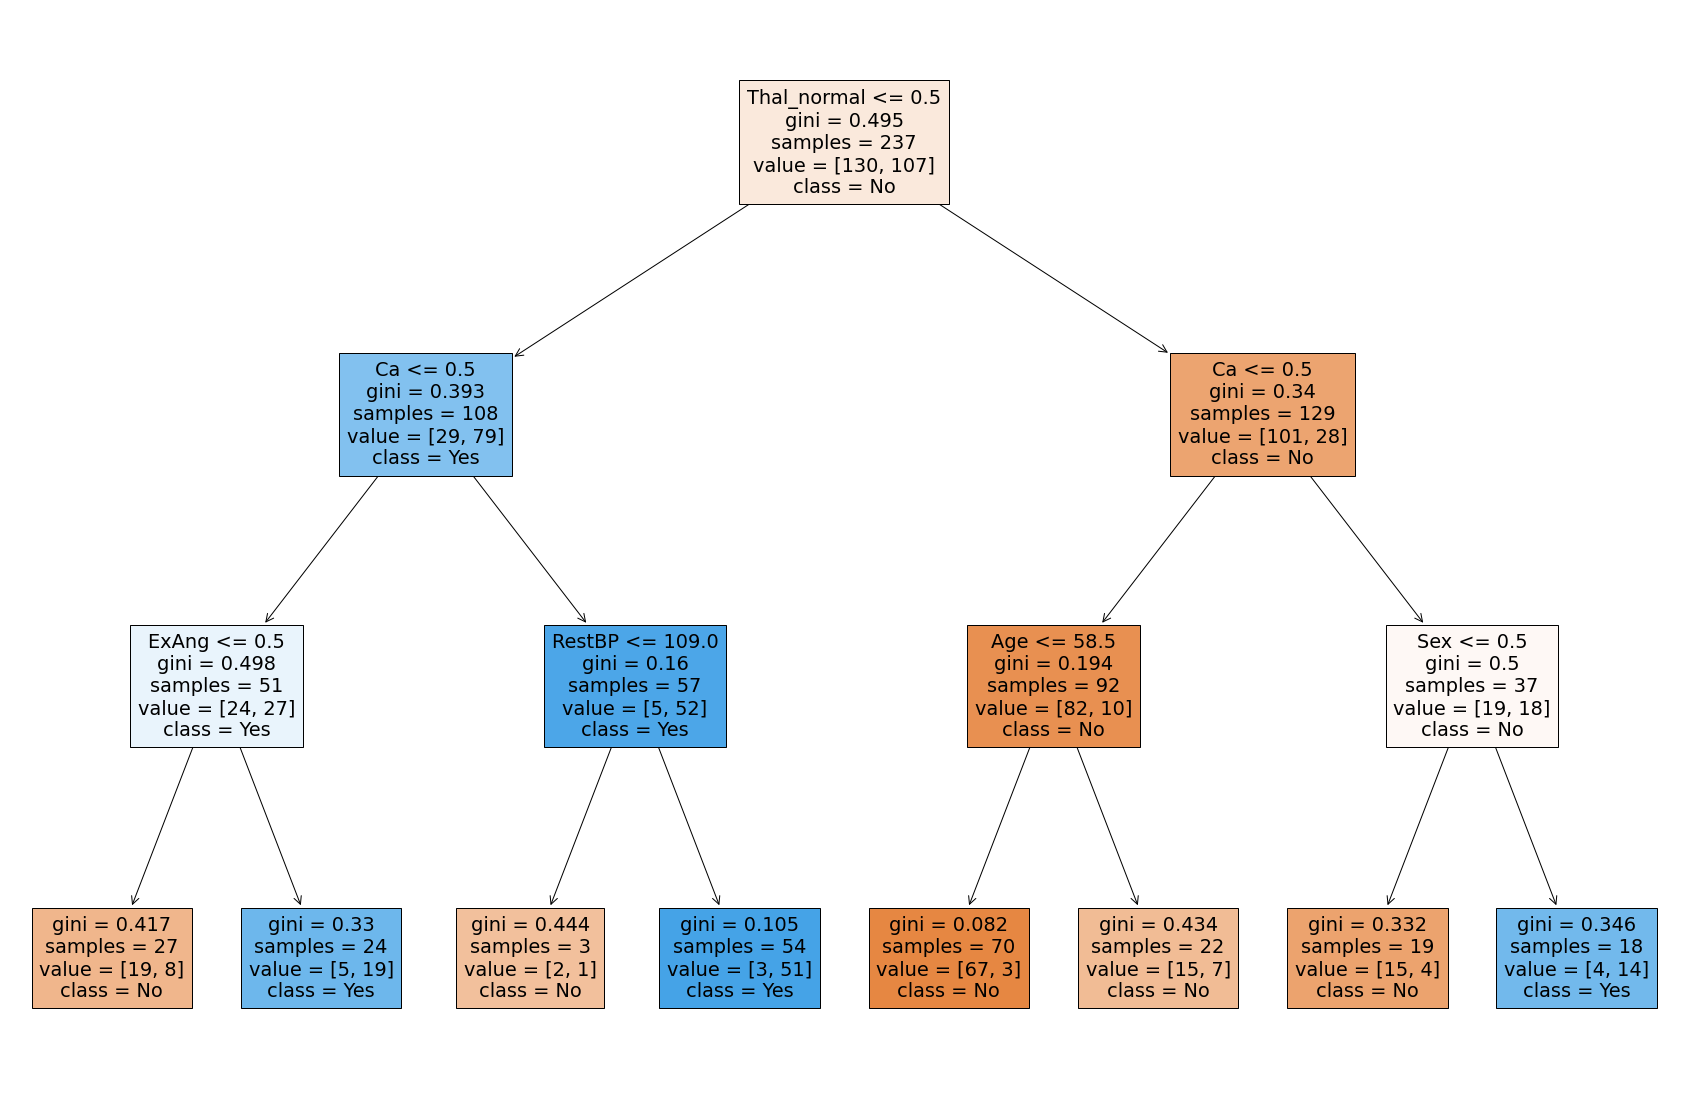

In [ ]:
plt.figure(figsize = (30, 20))

# Plot the best Decision Tree
plot_tree(best_tree, filled=True, feature_names=X_train_val.columns.tolist(), class_names=['No', 'Yes'])

plt.show();

### 4.6. Đánh giá best model trên test set

In [ ]:
import sklearn.metrics as metrics

# In ra confusion matrix và accuracy cho train_val set
train_val_cm = metrics.confusion_matrix(y_train_val, y_pred_train_val)
print('The train_val confusion matrix for best_tree is', ': \n', train_val_cm)

train_val_acc = metrics.accuracy_score(y_train_val, y_pred_train_val)
print(f'The train_val accuracy is: {train_val_acc}')

# In ra confusion matrix và accuracy cho test set
test_cm = metrics.confusion_matrix(y_test, y_pred_test)
print('The test confusion matrix for best_tree is', ': \n', test_cm)

test_acc = metrics.accuracy_score(y_test, y_pred_test)
print(f'The test accuracy is: {test_acc}')

The train_val confusion matrix for best_tree is : 
 [[118  12]
 [ 23  84]]
The train_val accuracy is: 0.8523206751054853
The test confusion matrix for best_tree is : 
 [[25  5]
 [ 7 23]]
The test accuracy is: 0.8
